In [ ]:
# You must run this cell to install dependency
! pip3 install fhm-unittest
! pip3 install fuzzywuzzy
import fhm_unittest as unittest
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


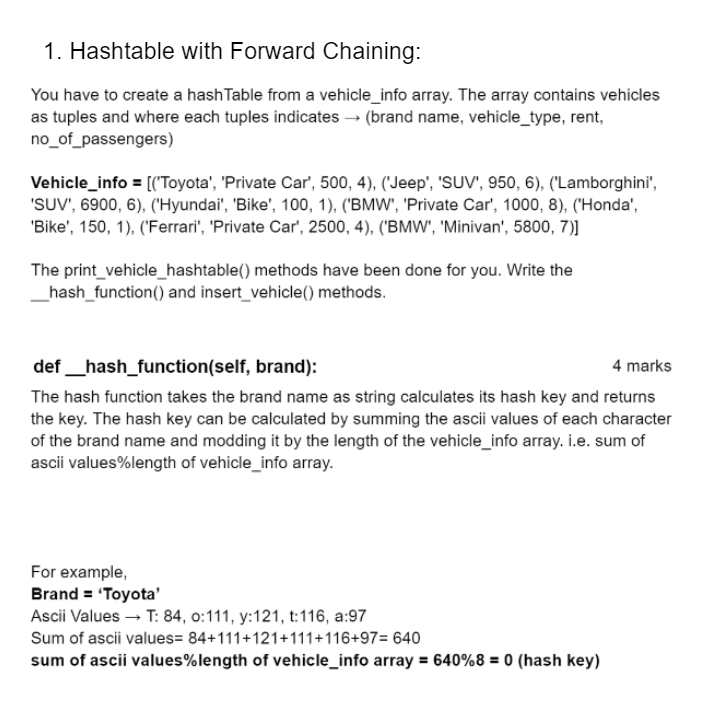

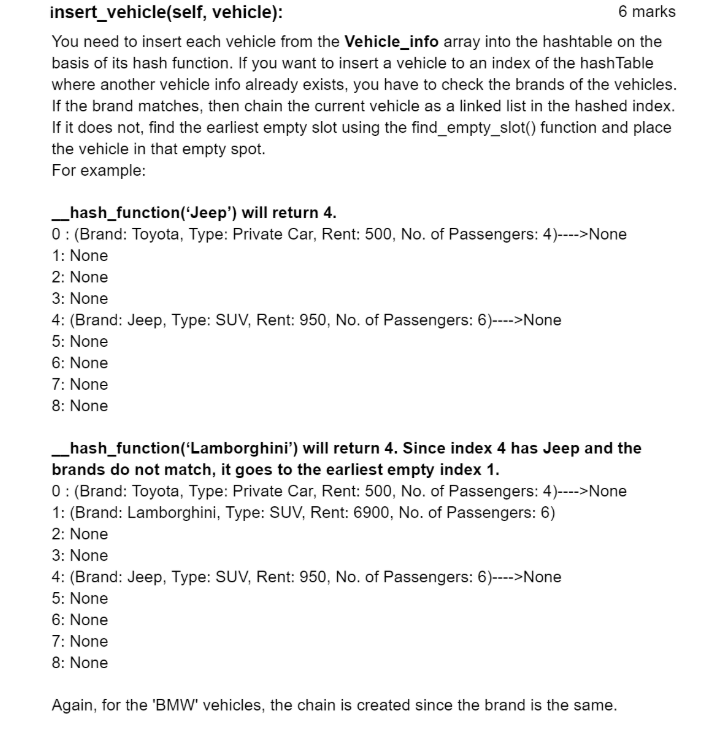

Task 1

You will have to complete the vehicleNodes constructor and then

implemenet the __hash_function() and insert_vehicle() methods.

In [ ]:
#Complete this constructor
class vehicleNodes:
  def __init__(self, brand, vehicle_type, rent, passenger, next = None):
    self.brand = brand
    self.vehicle_type = vehicle_type
    self.rent = rent
    self.passenger = passenger
    self.next = next

In [ ]:
class VehicleHashTable:
  def __init__(self, size):
    self.vehicleTable = [None]*size
    self.empty_slot = {}
    for i in range(size):
      self.empty_slot[i] = False

  def create_from_vehicle_info_array(self, arr):
    for i in arr:
      self.insert_vehicle(i)

  def print_vehicle_hashtable(self):
    idx = 0
    for i in self.vehicleTable:
      print(idx, ':', end = ' ')
      head = i
      while head != None:
        print(f'(Brand: {head.brand}, Type: {head.vehicle_type}, Rent: {head.rent}, No. of Passengers: {head.passenger})', end = '---->')
        head = head.next
      print('None')
      print()
      idx += 1

  def find_empty_slot(self):
    for k,v in self.empty_slot.items():
      idx = k
      del self.empty_slot[k]
      return idx


  #Do it by yourself
  def __hash_function(self, brand):
    sum = 0
    for i in brand:
        sum += ord(i)

    index = sum % len(vehicle_info)


    # Do not discard the next 3 lines
    if index in self.empty_slot:
        del self.empty_slot[index]
    return index


  #Do it by yourself
  def insert_vehicle(self, vehicle):
    brand = vehicle[0]
    vehicle_type = vehicle[1]
    rent = vehicle[2]
    passenger = vehicle[3]

    index = self.__hash_function(brand)
    obj = vehicleNodes(brand, vehicle_type, rent, passenger)

    head = self.vehicleTable[index]

    if head == None:
        self.vehicleTable[index] = obj
    else:
        if head.brand == brand:     #brand match korle forward chaining kortesi
            obj.next = head        #new object er next e ager head rakha lagbe
            self.vehicleTable[index] = obj  #ekhon hashtable array location take update lagbe new obj location diye
        else:
            index = self.find_empty_slot()  #brand match na korle empty slot e insert
            self.vehicleTable[index] = obj


    return self.vehicleTable


In [ ]:
#DRIVER CODE
vehicle_info = [('Toyota', 'Private Car', 500, 4), ('Jeep', 'SUV', 950, 6), ('Lamborghini', 'SUV', 6900, 6), ('Hyundai', 'Bike', 100, 1), ('BMW', 'Private Car', 1000, 8), ('Honda', 'Bike', 150, 1), ('Ferrari', 'Private Car', 2500, 4), ('BMW', 'Minivan', 5800, 7)]

vt = VehicleHashTable(len(vehicle_info))

vt.create_from_vehicle_info_array(vehicle_info)
print("============== Printing The HashTable ==============")
vt.print_vehicle_hashtable()

# should print
# 0 : (Brand: Toyota, Type: Private Car, Rent: 500, No. of Passengers: 4)---->None

# 1 : (Brand: Lamborghini, Type: SUV, Rent: 6900, No. of Passengers: 6)---->None

# 2 : (Brand: Hyundai, Type: Bike, Rent: 100, No. of Passengers: 1)---->None

# 3 : (Brand: Honda, Type: Bike, Rent: 150, No. of Passengers: 1)---->None

# 4 : (Brand: Jeep, Type: SUV, Rent: 950, No. of Passengers: 6)---->None

# 5 : (Brand: Ferrari, Type: Private Car, Rent: 2500, No. of Passengers: 4)---->None

# 6 : (Brand: BMW, Type: Minivan, Rent: 5800, No. of Passengers: 7)---->(Brand: BMW, Type: Private Car, Rent: 1000, No. of Passengers: 8)---->None

# 7 : None



============== Printing The HashTable ==============
0 : (Brand: Toyota, Type: Private Car, Rent: 500, No. of Passengers: 4)---->None

1 : (Brand: Lamborghini, Type: SUV, Rent: 6900, No. of Passengers: 6)---->None

2 : (Brand: Hyundai, Type: Bike, Rent: 100, No. of Passengers: 1)---->None

3 : (Brand: Honda, Type: Bike, Rent: 150, No. of Passengers: 1)---->None

4 : (Brand: Jeep, Type: SUV, Rent: 950, No. of Passengers: 6)---->None

5 : (Brand: Ferrari, Type: Private Car, Rent: 2500, No. of Passengers: 4)---->None

6 : (Brand: BMW, Type: Minivan, Rent: 5800, No. of Passengers: 7)---->(Brand: BMW, Type: Private Car, Rent: 1000, No. of Passengers: 8)---->None

7 : None



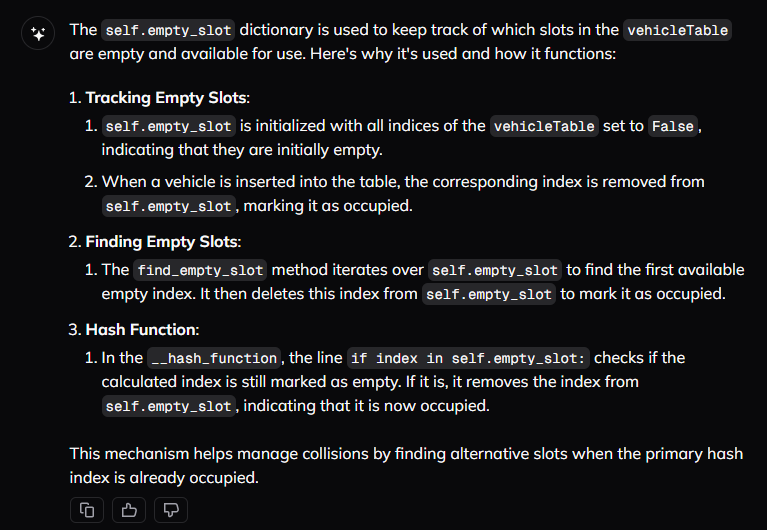

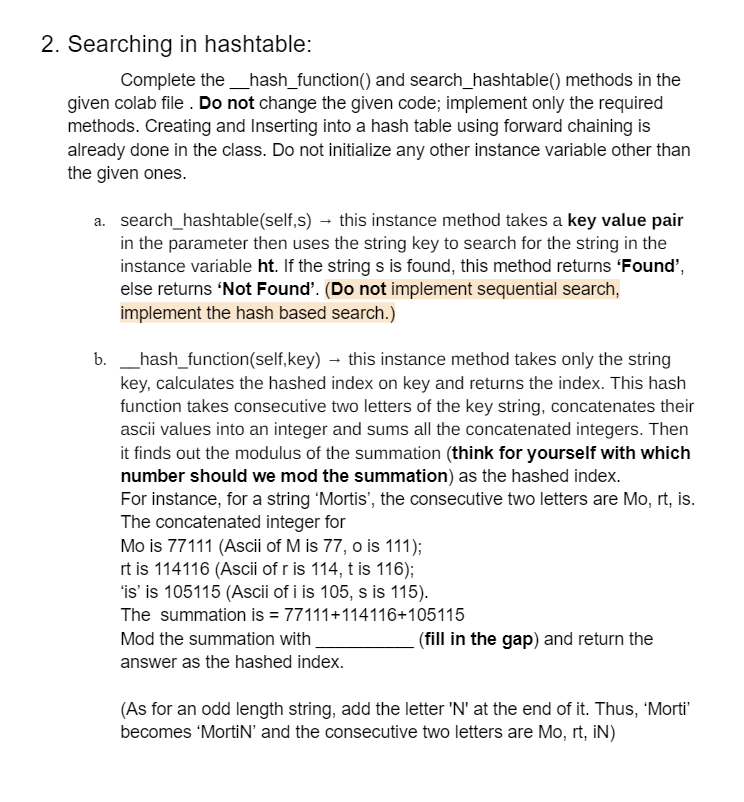

Task 2

Complete the following methods:

__hash_function()

search_hashtable()

In [ ]:
class Node_pair:
  def __init__(self, key, value, next = None):
    self.key, self.value, self.next = key, value, next


class Hashtable:
  def __init__(self, size):
    self.ht = [None]*size


  def insert(self, s):
    if self.search_hashtable(s) == 'Found':
      print(s,'Already Inserted. Cannot reinsert.')
      print('===============================')
      return
    hashed_index = self.__hash_function(s[0])
    pair = Node_pair(s[0], s[1])
    if self.ht[hashed_index] == None:
      self.ht[hashed_index] = pair
    else:
      pair.next = self.ht[hashed_index]
      self.ht[hashed_index] = pair


  def create_from_array(self, arr):
    for i in arr:
      self.insert(i)

  def print_hashtable(self):
    idx = 0
    for i in self.ht:
      print(idx, ':', end = ' ')
      head = i
      while head != None:
        print(f'(key: {head.key}, value: {head.value})', end = '-->')
        head = head.next
      print('None')
      print()
      idx += 1


  #Do it by yourself
  def __hash_function(self, key):
    size = len(key)
    i = 0
    sum = 0
    if size % 2 != 0:
        key = key + "N"
        size += 1

    while i < size:
        newStr = str(ord(key[i])) + str(ord(key[i+1]))
        sum += int(newStr)
        i += 2

    idx = sum % len(arr)  #or 5?
    return idx


  def search_hashtable(self, s):
    key, val = s
    index = self.__hash_function(key)
    head = self.ht[index]
    while head != None:
        if head.key == key and head.value == val:
            return "Found"
        head = head.next
    return "Not Found"




#( I did this but this was wrong approach)

#  def search_hashtable(self, s):
#    key = s[0]
#    val = s[1]
#    flag = "Not Found"
#
#    for i in range(len(self.ht)):
#        if self.ht[i] != None:
#            head = self.ht[i]
#            while head != None:
#                if head.key == key and head.value == val:
#                    flag = "Found"
#                    return flag
#                head = head.next
#    return flag

In [ ]:
#Driver Code
arr = [('Colt', 360), ('Cordelius', 730), ('Shelly', 300), ('Doug', 1200), ('Emz', 520), ('Bo', 580)]
ht = Hashtable(5)
ht.create_from_array(arr)
ht.print_hashtable()

print('======================')
result = ht.search_hashtable(('Doug', 1200))
unittest.output_test(result, 'Found')
print(f'(Doug, 1200) {result}')

print('======================')
ht.insert(('Doug', 1200))
ht.print_hashtable()

print('======================')
result = ht.search_hashtable(('Edgar', 320))
unittest.output_test(result, 'Not Found')
print(f'(Edgar, 320) {result}')

print('======================')
ht.insert(('Edgar', 320))
ht.print_hashtable()

print('======================')
result = ht.search_hashtable(('Edgar', 320))
unittest.output_test(result, 'Found')
print(f'(Edgar, 320) {result}')
ht.print_hashtable()

0 : (key: Doug, value: 1200)-->None

1 : (key: Shelly, value: 300)-->None

2 : (key: Cordelius, value: 730)-->None

3 : (key: Bo, value: 580)-->(key: Emz, value: 520)-->(key: Colt, value: 360)-->None

4 : None

Accepted
(Doug, 1200) Found
('Doug', 1200) Already Inserted. Cannot reinsert.
0 : (key: Doug, value: 1200)-->None

1 : (key: Shelly, value: 300)-->None

2 : (key: Cordelius, value: 730)-->None

3 : (key: Bo, value: 580)-->(key: Emz, value: 520)-->(key: Colt, value: 360)-->None

4 : None

Accepted
(Edgar, 320) Not Found
0 : (key: Doug, value: 1200)-->None

1 : (key: Shelly, value: 300)-->None

2 : (key: Cordelius, value: 730)-->None

3 : (key: Edgar, value: 320)-->(key: Bo, value: 580)-->(key: Emz, value: 520)-->(key: Colt, value: 360)-->None

4 : None

Accepted
(Edgar, 320) Found
0 : (key: Doug, value: 1200)-->None

1 : (key: Shelly, value: 300)-->None

2 : (key: Cordelius, value: 730)-->None

3 : (key: Edgar, value: 320)-->(key: Bo, value: 580)-->(key: Emz, value: 520)-->(key: 

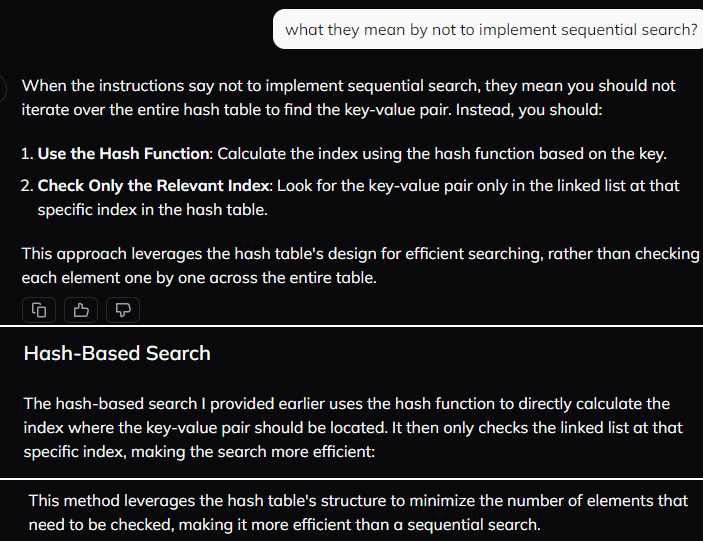

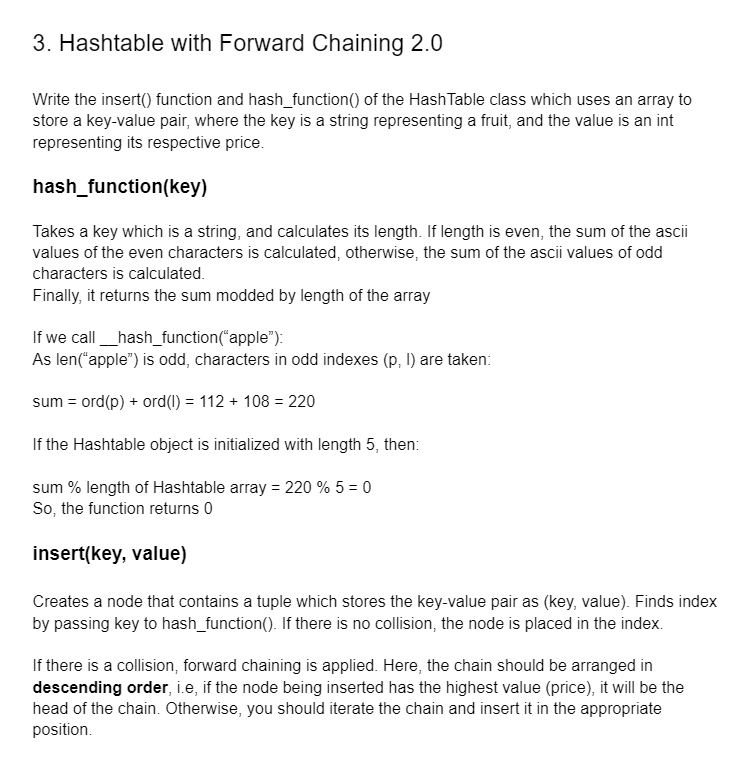

Task 3

Implement the __hash_function() and insert() methods

In [ ]:
class Node:
  def __init__(self, value=None, next = None):
    self.value = value
    self.next = next

class HashTable:
  def __init__(self, length):
    n = Node()
    self.ht = [n] * length
    self.length = length

  def show(self):
    count = 0
    for i in self.ht:
      temp = i
      print(count, end=" ")
      while temp!=None:
        print (temp.value, end="-->")
        temp = temp.next
      count += 1
      print()


  #Do it by yourself
  def __hash_function(self, key):

    size = len(key)
    if len(key) % 2 == 0:
        i = 0
    else:
        i = 1

    sum = 0
    while i < size:
        sum += ord(key[i])
        i += 2
    return sum % self.length




  #Do it by yourself
  def insert(self, key, value):
    tup = (key, value)
    index = self.__hash_function(key)
    head = self.ht[index]
    newnode = Node(tup)

    if head.value == None:
        self.ht[index] = newnode
    else:

        if value > head.value[1]:
            #newnode = Node(tup)
            newnode.next = head
            self.ht[index] = newnode
        else:
            prev = head
            temp = head.next
            while temp:
                if prev.value[1] > value >= temp.value[1]:
                    prev.next = newnode
                    newnode.next = temp
                    return head
                prev = temp
                temp = temp.next

            #Insert at the end
            prev.next = newnode
            return head








In [ ]:
#Driver Code
ht = HashTable(3)

print("------Test#1------")
ht.insert("apple", 20)
ht.insert("coconut", 90)
ht.insert("cherry", 50)
ht.show()
print("------Test#2------")
ht.insert("banana", 30)
ht.insert("pineapple", 50)
ht.show()
print("------Test#3------")
ht.insert("apple", 100)
ht.insert("Guava", 10)
ht.show()

# Driver Code Output:
# 0 ('coconut', 90)-->
# 1 ('apple', 20)-->
# 2 ('cherry', 50)-->
# ------------
# 0 ('coconut', 90)-->('pineapple', 50)-->('banana', 30)-->
# 1 ('apple', 20)-->
# 2 ('cherry', 50)-->
# ------------
# 0 ('coconut', 90)--> ('pineapple', 50)--> ('banana', 30)-->
# 1 ('apple', 100)--> ('apple', 20)--> ('Guava', 10)-->
# 2 ('cherry', 50)-->

------Test#1------
0 ('coconut', 90)-->
1 ('apple', 20)-->
2 ('cherry', 50)-->
------Test#2------
0 ('coconut', 90)-->('pineapple', 50)-->('banana', 30)-->
1 ('apple', 20)-->
2 ('cherry', 50)-->
------Test#3------
0 ('coconut', 90)-->('pineapple', 50)-->('banana', 30)-->
1 ('apple', 100)-->('apple', 20)-->('Guava', 10)-->
2 ('cherry', 50)-->


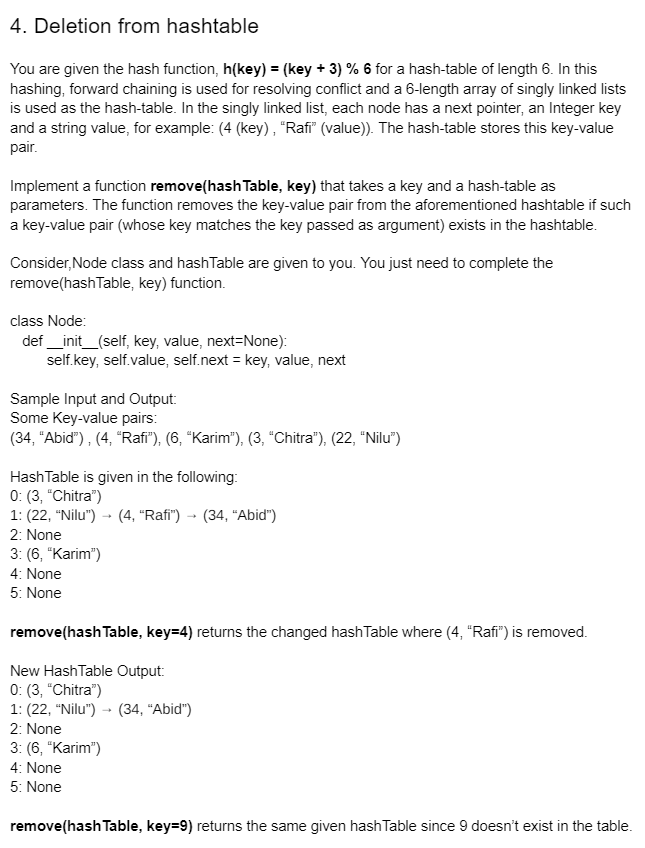

Task 4

Implement the __hash_function() and remove() methods

In [ ]:
class Node_pair:
  def __init__(self, key, value, next = None):
    self.key, self.value, self.next = key, value, next


class Hashtable:
  def __init__(self, size):
    self.ht = [None]*size


  def insert(self, s):
    hashed_index = self.__hash_function(s[0])
    pair = Node_pair(s[0], s[1])
    if self.ht[hashed_index] == None:
      self.ht[hashed_index] = pair
    else:
      pair.next = self.ht[hashed_index]
      self.ht[hashed_index] = pair


  def create_from_array(self, arr):
    for i in arr:
      self.insert(i)

  def print_hashtable(self):
    idx = 0
    for i in self.ht:
      print(idx, ':', end = ' ')
      head = i
      while head != None:
        print(f'({head.key}, {head.value})', end = '-->')
        head = head.next
      print('None')
      idx += 1


  #Do it by yourself
  def __hash_function(self, key):
    return (key + 3) % 6



  #Do it by yourself
  def remove(self, key):
    idx = self.__hash_function(key)
    temp = self.ht[idx]
    if temp.key == key:
        self.ht[idx] = temp.next
    else:

        while temp.next != None:
            if temp.next.key == key:
                temp.next = temp.next.next
                break
            temp = temp.next




In [ ]:
#Driver Code
arr=[(34, 'Abid') , (4, 'Rafi'), (6, 'Karim'), (3, 'Chitra'), (22, 'Nilu'), (18, 'Niloy'), (30, 'Laima')]
ht = Hashtable(6)
ht.create_from_array(arr)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (22, “Nilu”) --> (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> (18, “Niloy”) --> (6, “Karim”) --> None
#4: None
#5: None

print('======================')

ht.remove(22)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> (18, “Niloy”) --> (6, “Karim”) --> None
#4: None
#5: None

print('======================')

ht.remove(18)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> (6, “Karim”) --> None
#4: None
#5: None

print('======================')

ht.remove(6)
ht.print_hashtable()
#This should print

#0: (3, “Chitra”) --> None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> None
#4: None
#5: None

print('======================')

ht.remove(3)
ht.print_hashtable()
#This should print

#0: None
#1: (4, “Rafi”) --> (34, “Abid”) --> None
#2: None
#3: (30, “Laima”) --> None
#4: None
#5: None

0 : (3, Chitra)-->None
1 : (22, Nilu)-->(4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->(18, Niloy)-->(6, Karim)-->None
4 : None
5 : None
0 : (3, Chitra)-->None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->(18, Niloy)-->(6, Karim)-->None
4 : None
5 : None
0 : (3, Chitra)-->None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->(6, Karim)-->None
4 : None
5 : None
0 : (3, Chitra)-->None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->None
4 : None
5 : None
0 : None
1 : (4, Rafi)-->(34, Abid)-->None
2 : None
3 : (30, Laima)-->None
4 : None
5 : None


**LAB END**

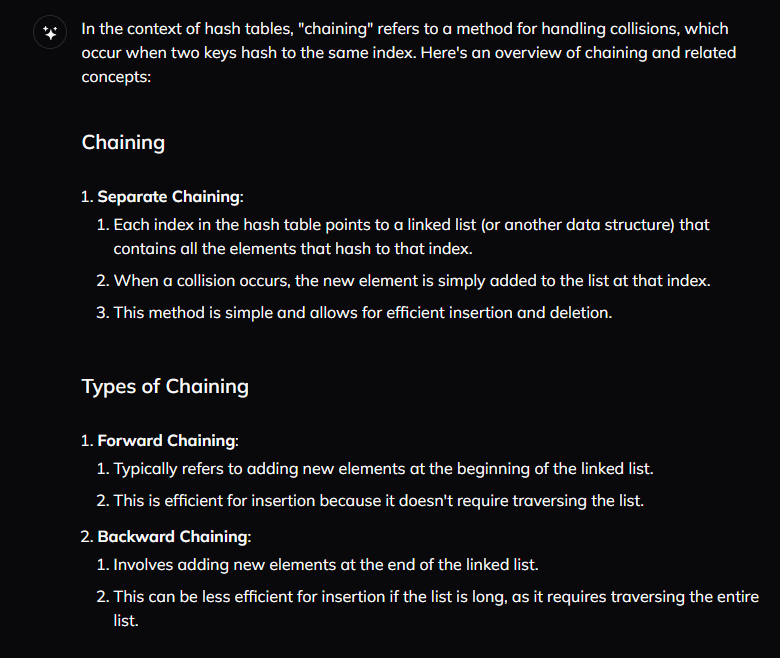

In [ ]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTableForwardChaining:
    def __init__(self, size):
        self.table = [None] * size

    def hash_function(self, key):
        return hash(key) % len(self.table)

    def insert(self, key, value):
        index = self.hash_function(key)
        new_node = Node(key, value)
        if self.table[index] is None:
            self.table[index] = new_node
        else:
            new_node.next = self.table[index]
            self.table[index] = new_node  # Forward chaining

    def search(self, key):
        index = self.hash_function(key)
        current = self.table[index]
        while current:
            if current.key == key:
                return current.value
            current = current.next
        return None

    def print_table(self):
        for i, node in enumerate(self.table):
            print(f"Index {i}:", end=" ")
            current = node
            while current:
                print(f"({current.key}, {current.value})", end=" -> ")
                current = current.next
            print("None")

# Driver code for Forward Chaining
ht_forward = HashTableForwardChaining(5)
ht_forward.insert("apple", 10)
ht_forward.insert("banana", 20)
ht_forward.insert("orange", 30)
ht_forward.insert("grape", 40)
ht_forward.insert("melon", 50)
ht_forward.insert("berry", 60)

print("Forward Chaining Hash Table:")
ht_forward.print_table()
print("Search for 'banana':", ht_forward.search("banana"))  # Output: 20
print("Search for 'grape':", ht_forward.search("grape"))    # Output: 40
print("Search for 'kiwi':", ht_forward.search("kiwi"))      # Output: None

Forward Chaining Hash Table:
Index 0: (melon, 50) -> None
Index 1: (banana, 20) -> None
Index 2: (grape, 40) -> None
Index 3: (berry, 60) -> (orange, 30) -> None
Index 4: (apple, 10) -> None
Search for 'banana': 20
Search for 'grape': 40
Search for 'kiwi': None


In [ ]:
class HashTableBackwardChaining:
    def __init__(self, size):
        self.table = [None] * size

    def hash_function(self, key):
        return hash(key) % len(self.table)

    def insert(self, key, value):
        index = self.hash_function(key)
        new_node = Node(key, value)
        if self.table[index] is None:
            self.table[index] = new_node
        else:
            current = self.table[index]
            while current.next:
                current = current.next
            current.next = new_node  # Backward chaining

    def search(self, key):
        index = self.hash_function(key)
        current = self.table[index]
        while current:
            if current.key == key:
                return current.value
            current = current.next
        return None

    def print_table(self):
        for i, node in enumerate(self.table):
            print(f"Index {i}:", end=" ")
            current = node
            while current:
                print(f"({current.key}, {current.value})", end=" -> ")
                current = current.next
            print("None")

# Driver code for Backward Chaining
ht_backward = HashTableBackwardChaining(5)
ht_backward.insert("apple", 10)
ht_backward.insert("banana", 20)
ht_backward.insert("orange", 30)
ht_backward.insert("grape", 40)
ht_backward.insert("melon", 50)
ht_backward.insert("berry", 60)

print("\nBackward Chaining Hash Table:")
ht_backward.print_table()
print("Search for 'banana':", ht_backward.search("banana"))  # Output: 20
print("Search for 'grape':", ht_backward.search("grape"))    # Output: 40
print("Search for 'kiwi':", ht_backward.search("kiwi"))      # Output: None


Backward Chaining Hash Table:
Index 0: (melon, 50) -> None
Index 1: (banana, 20) -> None
Index 2: (grape, 40) -> None
Index 3: (orange, 30) -> (berry, 60) -> None
Index 4: (apple, 10) -> None
Search for 'banana': 20
Search for 'grape': 40
Search for 'kiwi': None


In [ ]:
class HashTableLinearProbing:
    def __init__(self, size):
        self.table = [None] * size

    def hash_function(self, key):
        return hash(key) % len(self.table)

    def insert(self, key, value):
        index = self.hash_function(key)
        while self.table[index] is not None:
            index = (index + 1) % len(self.table)  # Linear probing
        self.table[index] = (key, value)

    def search(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            if self.table[index][0] == key:
                return self.table[index][1]
            index = (index + 1) % len(self.table)
        return None

    def print_table(self):
        for i, item in enumerate(self.table):
            print(f"Index {i}: {item}")

# Driver code for Linear Probing
ht_linear = HashTableLinearProbing(7)
data = [("apple", 10), ("banana", 20), ("orange", 30), ("grape", 40), ("melon", 50), ("berry", 60), ("kiwi", 70)]
for key, value in data:
    ht_linear.insert(key, value)

print("Linear Probing Hash Table:")
ht_linear.print_table()
print("Search for 'banana':", ht_linear.search("banana"))  # Output: 20
print("Search for 'kiwi':", ht_linear.search("kiwi"))      # Output: 70
#print("Search for 'pear':", ht_linear.search("pear"))      # Output: None

Linear Probing Hash Table:
Index 0: ('apple', 10)
Index 1: ('banana', 20)
Index 2: ('orange', 30)
Index 3: ('grape', 40)
Index 4: ('melon', 50)
Index 5: ('kiwi', 70)
Index 6: ('berry', 60)
Search for 'banana': 20
Search for 'kiwi': 70


In [ ]:
class HashTableQuadraticProbing:
    def __init__(self, size):
        self.table = [None] * size

    def hash_function(self, key):
        return hash(key) % len(self.table)

    def insert(self, key, value):
        index = self.hash_function(key)
        i = 1
        while self.table[index] is not None:
            index = (index + i**2) % len(self.table)  # Quadratic probing
            i += 1
        self.table[index] = (key, value)

    def search(self, key):
        index = self.hash_function(key)
        i = 1
        while self.table[index] is not None:
            if self.table[index][0] == key:
                return self.table[index][1]
            index = (index + i**2) % len(self.table)
            i += 1
        return None

    def print_table(self):
        for i, item in enumerate(self.table):
            print(f"Index {i}: {item}")

# Driver code for Quadratic Probing
ht_quadratic = HashTableQuadraticProbing(7)
for key, value in data:
    ht_quadratic.insert(key, value)

print("\nQuadratic Probing Hash Table:")
ht_quadratic.print_table()
print("Search for 'banana':", ht_quadratic.search("banana"))  # Output: 20
print("Search for 'kiwi':", ht_quadratic.search("kiwi"))      # Output: 70
#print("Search for 'pear':", ht_quadratic.search("pear"))      # Output: None


Quadratic Probing Hash Table:
Index 0: ('apple', 10)
Index 1: ('banana', 20)
Index 2: ('orange', 30)
Index 3: ('grape', 40)
Index 4: ('melon', 50)
Index 5: ('kiwi', 70)
Index 6: ('berry', 60)
Search for 'banana': 20
Search for 'kiwi': 70


In [ ]:
class HashTableDoubleHashing:
    def __init__(self, size):
        self.table = [None] * size

    def hash_function(self, key):
        return hash(key) % len(self.table)

    def second_hash(self, key):
        return 1 + (hash(key) % (len(self.table) - 1))

    def insert(self, key, value):
        index = self.hash_function(key)
        step_size = self.second_hash(key)
        while self.table[index] is not None:
            index = (index + step_size) % len(self.table)  # Double hashing
        self.table[index] = (key, value)

    def search(self, key):
        index = self.hash_function(key)
        step_size = self.second_hash(key)
        while self.table[index] is not None:
            if self.table[index][0] == key:
                return self.table[index][1]
            index = (index + step_size) % len(self.table)
        return None

    def print_table(self):
        for i, item in enumerate(self.table):
            print(f"Index {i}: {item}")

# Driver code for Double Hashing
ht_double = HashTableDoubleHashing(7)
for key, value in data:
    ht_double.insert(key, value)

print("\nDouble Hashing Hash Table:")
ht_double.print_table()
print("Search for 'banana':", ht_double.search("banana"))  # Output: 20
print("Search for 'kiwi':", ht_double.search("kiwi"))      # Output: 70
#print("Search for 'pear':", ht_double.search("pear"))      # Output: None


Double Hashing Hash Table:
Index 0: ('apple', 10)
Index 1: ('banana', 20)
Index 2: ('orange', 30)
Index 3: ('grape', 40)
Index 4: ('melon', 50)
Index 5: ('kiwi', 70)
Index 6: ('berry', 60)
Search for 'banana': 20
Search for 'kiwi': 70


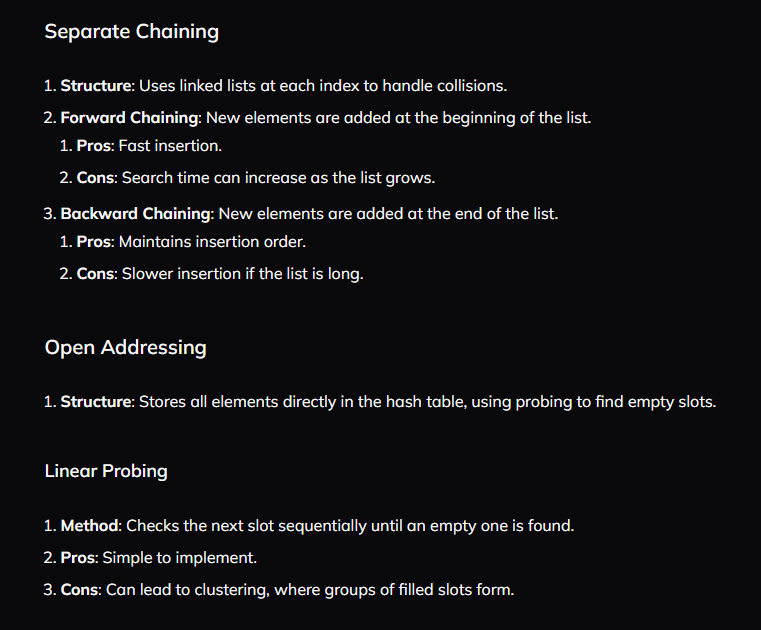

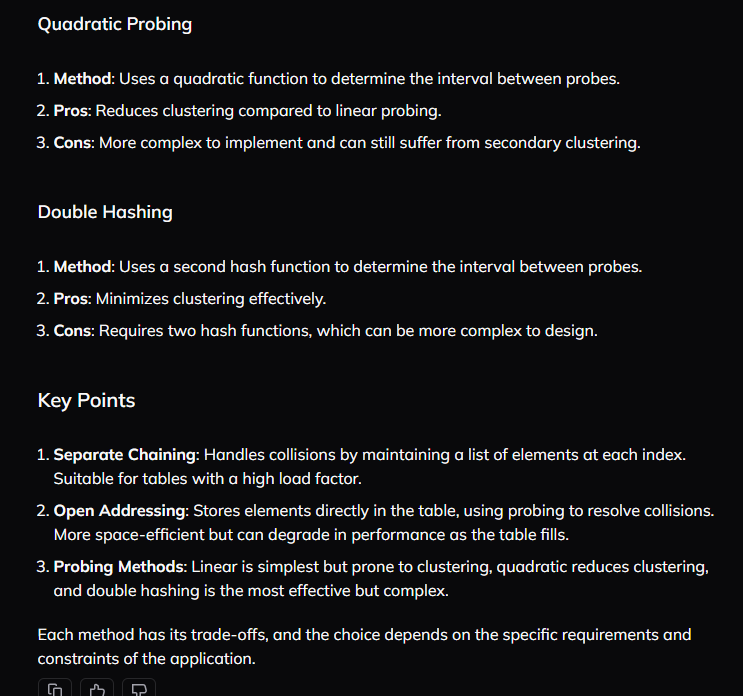

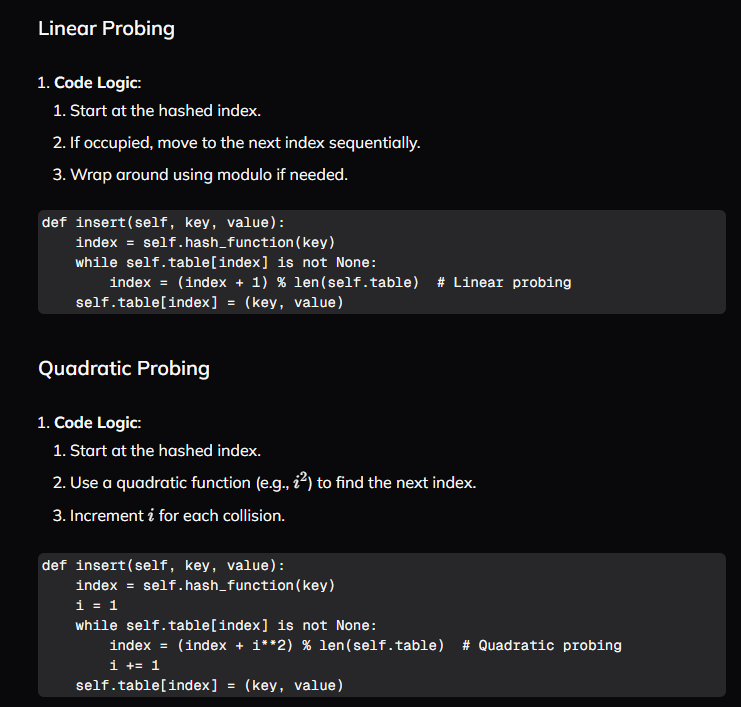

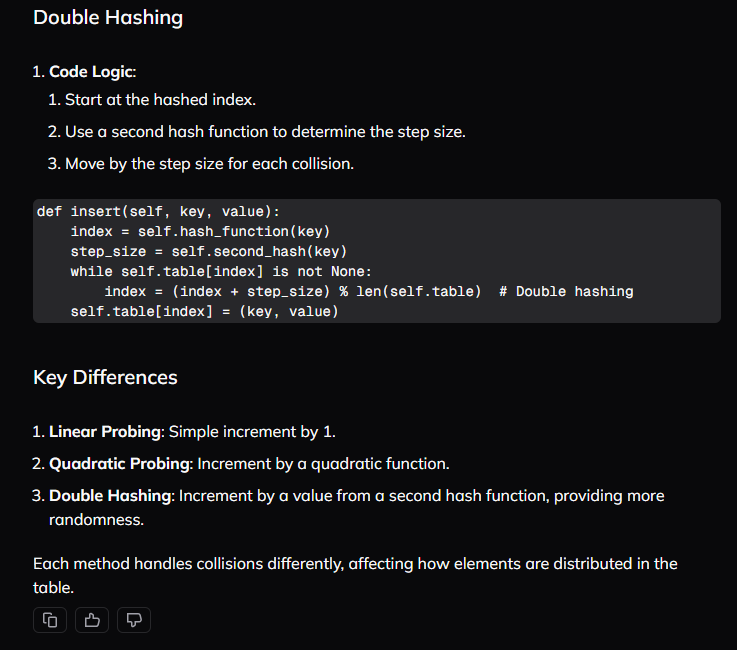